In [1]:
import os
import pandas as pd
import numpy as py
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/ShaiYona/StatisticalAnalysis2022C/main/Assignment1/titanic_dataset.csv'
data = pd.read_csv(url)
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Question 1 #

* How many males and females are on board?


In [3]:

# ********* WRITE YOUR CODE HERE************
print('number of males on board:\t',sum(data['Sex']=='male'))
print('number of females on board:\t',sum(data['Sex']=='female'))

# ********* WRITE YOUR CODE HERE************

number of males on board:	 577
number of females on board:	 314


#### Show a bar plot titled "Passenger gender distribution" that presents the number of passengers by gender


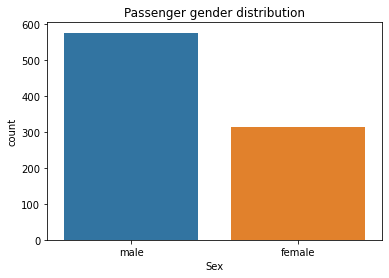

In [4]:
ax = sns.countplot(x='Sex',data=data).set_title("Passenger gender distribution");

### Question 2 #
#### How many kids (passengers under the age 18) are on board?

######## ********* WRITE YOUR CODE HERE ************

In [5]:
kidsData = data[data['Age']<=18]
print('number of kids on board:\t',len(kidsData))

number of kids on board:	 139


### Question 3 #
#### How many males and females kids are on board?



In [6]:
##### ********* WRITE YOUR CODE HERE************
print('number of males kids:\t',sum(kidsData['Sex']=='male'))
print('number of females kids:\t',sum(kidsData['Sex']=='female'))

number of males kids:	 71
number of females kids:	 68


In [7]:
## display a bar plot titled "Children gender distribution (without adults)"

# ********* WRITE YOUR CODE HERE************

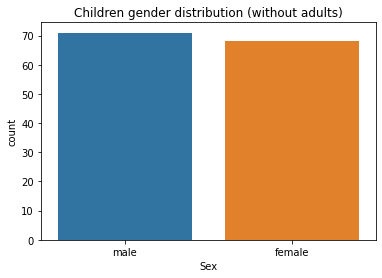

In [8]:
ax = sns.countplot(x='Sex',data=kidsData).set_title("Children gender distribution (without adults)");

##############
### Question 4 #
##############
#### Display the tickets costs for the different classes, use a boxplot entitled "Fare Box Plot"

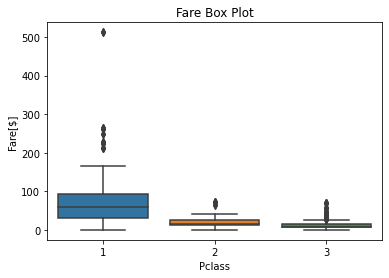

In [9]:
# ********* WRITE YOUR CODE HERE************
ax = sns.boxplot(x='Pclass', y='Fare', data=data);
ax.set_title("Fare Box Plot");
ax.set_ylabel('Fare[$]');

### Question 5 #
#### Who were the passengers who traveled for free (Fare == 0)? What are their honor titles?


In [17]:
# ********* WRITE YOUR CODE HERE************
freeData  = data[data['Fare']==0] # what is the honor title?
# TODO:  parse for honor title (secnod after split)
splitedFreeData = freeData["Name"].str.split()
freeData['honor'] = splitedFreeData.apply(lambda x: x[1]);
freeData



<ipython-input-17-6c23c1675a65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeData['honor'] = splitedFreeData.apply(lambda x: x[1]);


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,honor
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr.
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr.
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr.
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr.
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr.
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr.
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr.
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr.
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr.
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr.


### Question 6 #
## What are the most outrageous ticket prices the passengers paid (outliers)?
#### see https://en.wikipedia.org/wiki/Outlier. Calculate the outlier range using Tukey's fences and ticket prices above it. 


In [11]:
# reference at: https://www.statskingdom.com/outlier-calculator.html
# Lower fence = Q1 - k * IRQ.
# Upper fence = Q3 + k * IRQ.
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
k=1.5
IRQ = Q3-Q1
lowerFence = Q1-k*IRQ
upperFence = Q3+k*IRQ

In [12]:
data[data['Fare']>upperFence]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [13]:
data[data['Fare']<lowerFence]
print('lower fence value is[$]:\t',lowerFence)

lower fence value is[$]:	 -26.724


* No data is listed since the calculated lower fence is negative 0 below possible ticket fare

### Question 7 #
#### What are the costs of first class tickets?

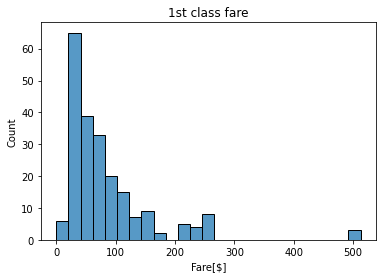

In [14]:
# ********* WRITE YOUR CODE HERE************
## display a histogram entitled "1st class fare"
firstClass = data[data['Pclass']==1]
firstClassFare = firstClass['Fare']
ax = sns.histplot(data=firstClassFare)
ax.set_title("1st class fare");
ax.set_xlabel('Fare[$]');

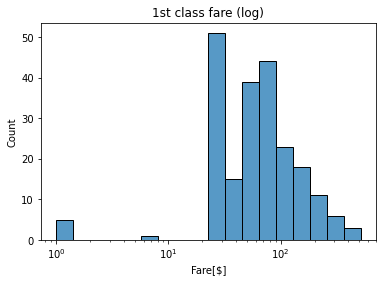

In [15]:
## display a histogram entitled 1st class log fare" (add 1 to the price to avoid log(0)=-Inf)
firstClassFarePlus1 = firstClassFare+1
ax = sns.histplot(data=firstClassFarePlus1 , log_scale=True);
ax.set_title("1st class fare (log)");
ax.set(xlabel = 'Fare[$]');